In [98]:
from deepface import DeepFace
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DB_ROOT_PATH = "samples"
TEST_METRIC = "cosine"

representation_models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
detection_models = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']
metrics = ["cosine", "euclidean", "euclidean_l2"]
built_models = {}
metrics_model_column = {}

for met in metrics:
    metrics_model_column[met] = []

for rep in representation_models:
    built_models[rep] = DeepFace.build_model(rep)
    for met in metrics:
        metrics_model_column[met].append(f'{rep} - {DeepFace.dst.findThreshold(model_name=rep, distance_metric=met): .3f}')

In [99]:
def benchmark_frl(src_path, comp_path, metric="cosine", show_data=False, representation_models=None, detection_models=None, ignore_errors=True):
    # Check for representation models benchmark options
    if representation_models == None:
        representation_models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
    # Check for detection models benchmark options
    if detection_models == None:
        detection_models = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']
        
    # Result verification data
    data = []
    error_table = None
    
    # Loop throuh passed detection models
    for detect in detection_models:
        # List to store data for each representation models
        row_data = []
        # Loop through the passed representation models
        for rep in representation_models:
            
            resultStr = ""
            try:
                tic = time.time()
                result = DeepFace.verify(src_path, comp_path, model=built_models[rep], distance_metric=metric, detector_backend=detect)
                toc = time.time()
                seconds = toc - tic
                verified = "F"
                if (result["verified"]):
                    verified = "T"
                    
                resultStr = f'{verified} - {result["distance"]: .3f}, {seconds: .2f}s'
            except Exception as err:
                result = {'success': False, 'error': str(err)}
                resultStr = "error"
                # Initialize error table for the first time
                if error_table == None:
                    error_table = {}
                
                error_table[f'{detect} + {rep}'] = err
            
            # Calculate time taken for the DeepFace's verify function
            if (show_data):
                row_data.append(resultStr)
            else:
                row_data.append(result)
        
        if (show_data):
            data.append(row_data)
        else:
            data.append(row_data)
    
    if ignore_errors:
        return data
    else:
        return data, error_table
    

In [100]:
def show_image_pair(src, comp):
    src_img = mpimg.imread(src)
    comp_img = mpimg.imread(comp)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(src_img)
    ax[1].imshow(comp_img)

In [101]:
results_1 = {}
errors_1 = {}
src_path = f'{DB_ROOT_PATH}/1/src.png'
comp_path = f'{DB_ROOT_PATH}/1/comp.png'

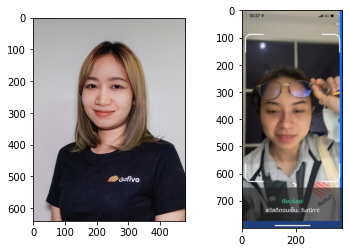

In [103]:
for metric in metrics:
    result, err = benchmark_frl(src_path, comp_path, metric=metric, show_data=True, ignore_errors=False)
    results_1[metric] = result
    errors_1[metric] = err
    
show_image_pair(src_path, comp_path)

In [113]:
TEST_METRIC = "cosine"
pd.DataFrame(results_1[TEST_METRIC], columns= list(metrics_model_column[TEST_METRIC]), index=detection_models)

,VGG-Face - 0.400,Facenet - 0.400,Facenet512 - 0.300,OpenFace - 0.100,DeepFace - 0.230,DeepID - 0.015,ArcFace - 0.680,Dlib - 0.070
opencv,"T - 0.386, 0.79s","F - 0.555, 0.34s","F - 0.801, 0.33s","T - 0.244, 0.25s","T - 0.314, 0.31s","T - 0.021, 0.22s","F - 0.826, 0.47s","T - 0.061, 0.89s"
ssd,"F - 0.407, 0.74s","F - 0.579, 0.32s","F - 0.690, 0.32s","T - 0.212, 0.24s","T - 0.329, 0.29s","T - 0.024, 0.20s","F - 0.788, 0.46s","T - 0.047, 0.86s"
dlib,"F - 0.420, 1.12s","F - 0.641, 0.60s","F - 0.837, 0.56s","T - 0.271, 0.49s","F - 0.433, 0.53s","T - 0.024, 0.48s","F - 0.831, 0.77s","T - 0.069, 1.10s"
mtcnn,"F - 0.417, 2.00s","F - 0.661, 1.65s","F - 0.673, 1.60s","T - 0.182, 1.53s","T - 0.330, 1.57s","T - 0.013, 2.23s","F - 0.789, 1.79s","T - 0.070, 2.46s"
retinaface,"F - 0.420, 9.70s","F - 0.559, 9.20s","F - 0.671, 9.39s","F - 0.406, 9.45s","T - 0.312, 9.45s","T - 0.018, 9.34s","F - 0.780, 9.65s","T - 0.061, 9.97s"


In [114]:
if errors_1[TEST_METRIC] != None:
    pd.DataFrame(errors_1[TEST_METRIC].values(), index=err.keys())

In [ ]:
results_2 = {}
errors_2 = {}
src_path = f'{DB_ROOT_PATH}/2/src.png'
comp_path = f'{DB_ROOT_PATH}/2/comp.png'

In [ ]:
for metric in metrics:
    result, err = benchmark_frl(src_path, comp_path, metric=metric, show_data=True, ignore_errors=False)
    results_2[metric] = result
    errors_2[metric] = err
    
show_image_pair(src_path, comp_path)

In [ ]:
pd.DataFrame(results_2[TEST_METRIC], columns= representation_models, index=detection_models)

In [ ]:
if errors_2["cosine"] != None:
    pd.DataFrame(errors_2[TEST_METRIC].values(), index=err.keys())